# 导入数据

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib.font_manager import FontProperties

In [110]:
corn = loadmat('./data/NIRcorn.mat')
corn

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 10 19:54:46 2014',
 '__version__': '1.0',
 '__globals__': [],
 'm5spec': array([[(array(['m5spec'], dtype='<U6'), array(['data'], dtype='<U4'), array([], dtype='<U1'), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   48.345]]), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   53.016]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
                 0.730594 ],
                [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
                 0.72703  ],
                [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
                 0.705967 ],
                ...,
                [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
                 0.747532 ],
                [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
                 0.735732 

# 查看数据信息

In [111]:
corn.keys()

dict_keys(['__header__', '__version__', '__globals__', 'm5spec', 'cornspect', 'cornwavelength', 'propvals', 'cornprop', 'NIRcoin', 'information', 'mp5spec', 'mp6spec', 'm5nbs', 'mp5nbs', 'mp6nbs'])

In [112]:
corn['information']
# 得到关键信息：
# 80个样本、3台不同的仪器、波长范围为1100-2498nm，间隔为2nm（700通道）、每个样本还有4个属性：水分、油、蛋白质和淀粉值

array(['This data set consists of 80 samples of corn measured on    ',
       '3 different NIR spectrometers. The wavelength range is      ',
       '1100-2498nm at 2 nm intervals (700 channels). The moisture, ',
       'oil, protein and starch values for each of the samples is   ',
       'also included. A number of NBS glass standards were also    ',
       'measured on each instrument. The data was originally taken  ',
       'at Cargill. Many thanks for Mike Blackburn for letting us   ',
       'distribute it.                                              ',
       '                                                            ',
       'The variables in this data set are described below:         ',
       '   information: [20x59  char  ] This field                  ',
       '        m5spec: [80x700 dataset] Spectra on instrument m5   ',
       '       mp5spec: [80x700 dataset] Spectra on instrument mp5  ',
       '       mp6spec: [80x700 dataset] Spectra on instrument mp6  ',
      

In [113]:
corn['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 10 19:54:46 2014'

In [114]:
corn['__version__']

'1.0'

In [115]:
corn['__globals__']

[]

# 以m5spec为例查看目标数据并绘图

## 以m5spec为例探寻怎样取出我们需要的数据

In [116]:
# corn为dict类型的数据，通过键值对的方式取出
corn['m5spec']
# 可以发现数据很混杂

array([[(array(['m5spec'], dtype='<U6'), array(['data'], dtype='<U4'), array([], dtype='<U1'), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   48.345]]), array([[2005.   ,    5.   ,   13.   ,    9.   ,   50.   ,   53.016]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
                0.730594 ],
               [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
                0.72703  ],
               [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
                0.705967 ],
               ...,
               [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
                0.747532 ],
               [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
                0.735732 ],
               [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
                0.728245 ]]), array([[array([], dtype='<U1'), array([], dtype='

In [117]:
# 在上方数据中可以看到array(['data'], dtype='<U4')，尝试取出
corn['m5spec']['data']

array([[array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
                0.730594 ],
               [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
                0.72703  ],
               [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
                0.705967 ],
               ...,
               [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
                0.747532 ],
               [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
                0.735732 ],
               [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
                0.728245 ]])                                               ]],
      dtype=object)

In [118]:
# 为了方便理解，将取出的数据先进行赋值
m5spec_data=corn['m5spec']['data']
# 查看数组的大小，再决定下一步怎么取
np.shape(m5spec_data)

(1, 1)

In [119]:
# 1×1的二维数组，尝试取出1行1列的数据
m5spec_data[0][0]
# 发现还是一个二维数组

array([[0.0444948, 0.0443834, 0.0442581, ..., 0.731327 , 0.730944 ,
        0.730594 ],
       [0.0465041, 0.0463485, 0.0462297, ..., 0.727786 , 0.727504 ,
        0.72703  ],
       [0.0469579, 0.046817 , 0.0466632, ..., 0.706597 , 0.706122 ,
        0.705967 ],
       ...,
       [0.0497173, 0.0495729, 0.0494713, ..., 0.748217 , 0.747987 ,
        0.747532 ],
       [0.0594381, 0.0593211, 0.0592224, ..., 0.736457 , 0.736197 ,
        0.735732 ],
       [0.0500851, 0.0499276, 0.0498294, ..., 0.728992 , 0.728863 ,
        0.728245 ]])

In [120]:
# 再一次赋值，方便理解
m5spec=m5spec_data[0][0]
# 查看取出数据的大小
np.shape(m5spec)
# 从information得到的数据可以知道，这个80×700的二维矩阵是80个样本在1100-2498nm波长范围内(共700个通道)下的吸光率数据

(80, 700)

## 绘图

### x轴数据

In [121]:
# 方法一：已知是在1100-2498nm波长范围内(共700个通道)下的实验，可以通过numpy建立等差数列
x = np.linspace(1100,2498,700)
x

array([1100., 1102., 1104., 1106., 1108., 1110., 1112., 1114., 1116.,
       1118., 1120., 1122., 1124., 1126., 1128., 1130., 1132., 1134.,
       1136., 1138., 1140., 1142., 1144., 1146., 1148., 1150., 1152.,
       1154., 1156., 1158., 1160., 1162., 1164., 1166., 1168., 1170.,
       1172., 1174., 1176., 1178., 1180., 1182., 1184., 1186., 1188.,
       1190., 1192., 1194., 1196., 1198., 1200., 1202., 1204., 1206.,
       1208., 1210., 1212., 1214., 1216., 1218., 1220., 1222., 1224.,
       1226., 1228., 1230., 1232., 1234., 1236., 1238., 1240., 1242.,
       1244., 1246., 1248., 1250., 1252., 1254., 1256., 1258., 1260.,
       1262., 1264., 1266., 1268., 1270., 1272., 1274., 1276., 1278.,
       1280., 1282., 1284., 1286., 1288., 1290., 1292., 1294., 1296.,
       1298., 1300., 1302., 1304., 1306., 1308., 1310., 1312., 1314.,
       1316., 1318., 1320., 1322., 1324., 1326., 1328., 1330., 1332.,
       1334., 1336., 1338., 1340., 1342., 1344., 1346., 1348., 1350.,
       1352., 1354.,

In [122]:
# 方法二：通过数据集中已知的cornwavelength进行稍微操作得到一维的数组
corn['cornwavelength']

array([[1100],
       [1102],
       [1104],
       [1106],
       [1108],
       [1110],
       [1112],
       [1114],
       [1116],
       [1118],
       [1120],
       [1122],
       [1124],
       [1126],
       [1128],
       [1130],
       [1132],
       [1134],
       [1136],
       [1138],
       [1140],
       [1142],
       [1144],
       [1146],
       [1148],
       [1150],
       [1152],
       [1154],
       [1156],
       [1158],
       [1160],
       [1162],
       [1164],
       [1166],
       [1168],
       [1170],
       [1172],
       [1174],
       [1176],
       [1178],
       [1180],
       [1182],
       [1184],
       [1186],
       [1188],
       [1190],
       [1192],
       [1194],
       [1196],
       [1198],
       [1200],
       [1202],
       [1204],
       [1206],
       [1208],
       [1210],
       [1212],
       [1214],
       [1216],
       [1218],
       [1220],
       [1222],
       [1224],
       [1226],
       [1228],
       [1230],
       [12

In [123]:
# 发现是700行1列的二维数组
np.shape(corn['cornwavelength'])

(700, 1)

In [124]:
# 转换为一维的等差数列数组作为x轴
wavelength=corn['cornwavelength'][:,0]
np.shape(wavelength)

(700,)

### y轴数据

In [125]:
# 生成80个随机颜色
color = [0 for x in range(0, 80)]
for i in range(0,80):
    color[i]=np.random.rand(3,)
np.shape(color)    

(80, 3)

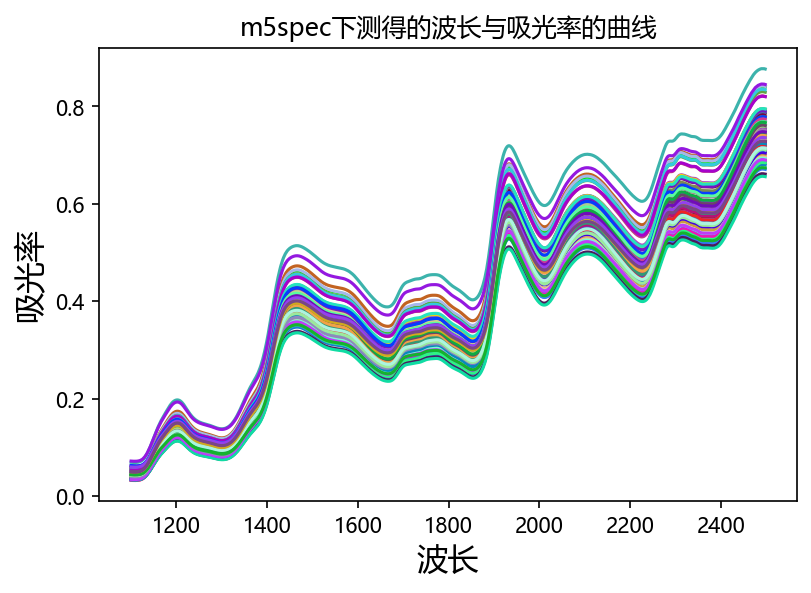

In [155]:
# 绘制m5spec下的不同波长对应不同吸光率的曲线
plt.figure(1,dpi=150)

plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("m5spec下测得的波长与吸光率的曲线")
plt.xlabel("波长", fontsize=15)
plt.ylabel("吸光率", fontsize=15)
for i in range(0,80):
    plt.plot(wavelength,m5spec[i],color=color[i]) # 用numpy随机生成三个值作为RGB

plt.show()

# 画出mp5spec、mp6spec和cornspect下的的波长-吸光率曲线

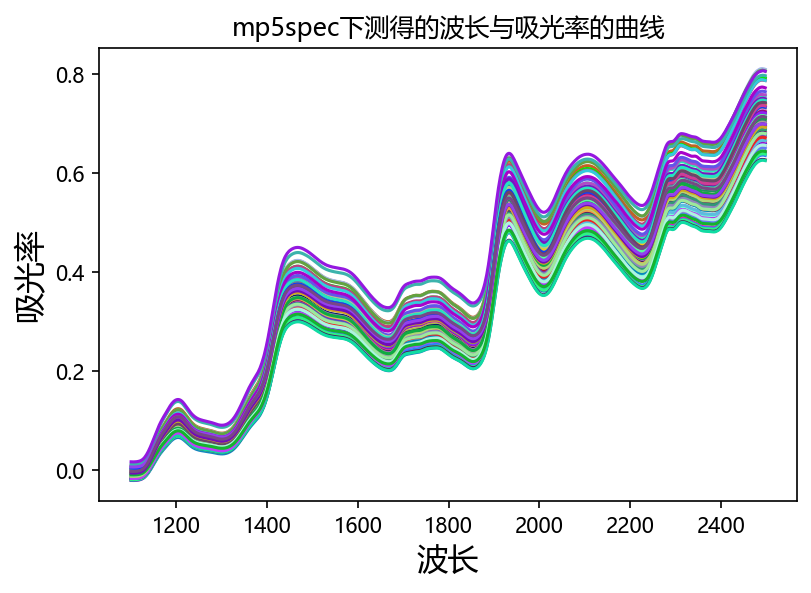

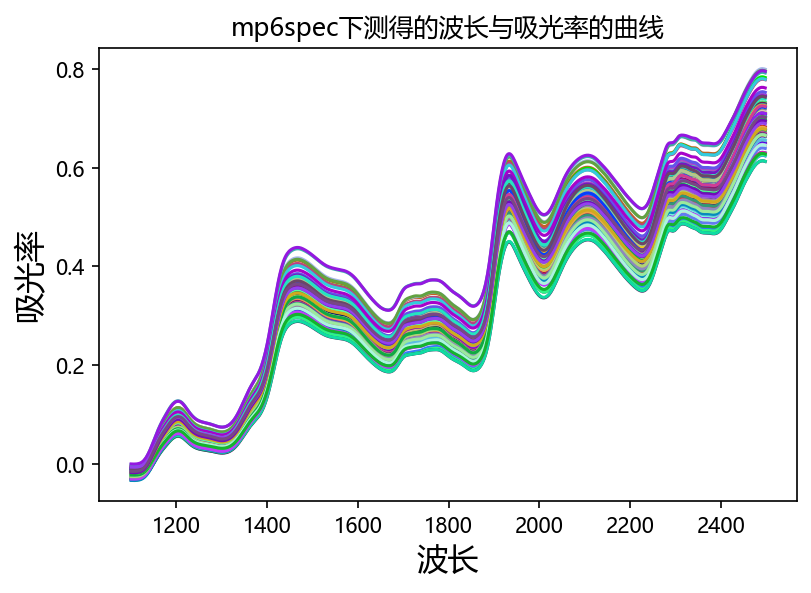

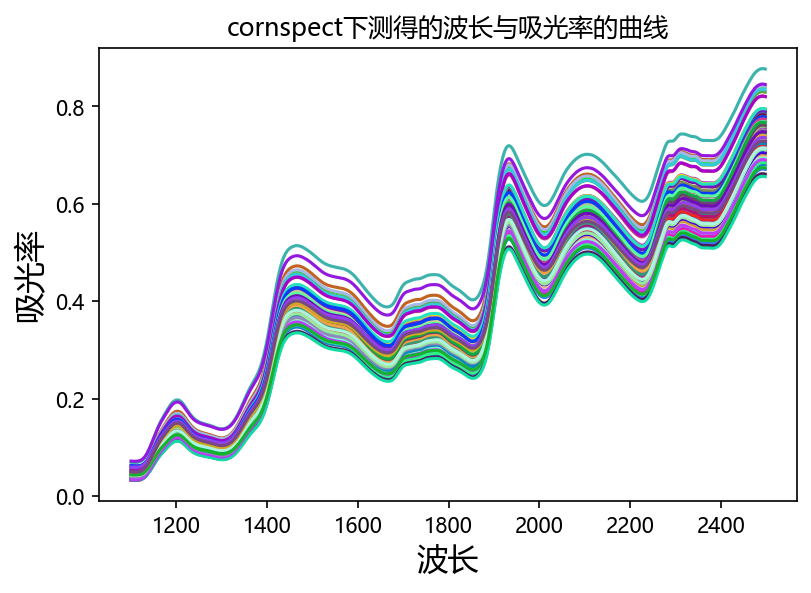

In [167]:
# 为了方便，就不像m5spec一样进行两次赋值了
mp5spec = corn['mp5spec']['data'][0][0]
mp6spec = corn['mp6spec']['data'][0][0]
# cornspect不需要再取出，已经是80×700的二维数组
cornspect = corn['cornspect']
source = ['mp5spec', 'mp6spec', 'cornspect']

def picture(num,kind):
    plt.figure(num,dpi=150)

    plt.rcParams['font.sans-serif']=['Microsoft YaHei']
    plt.title("%s下测得的波长与吸光率的曲线"%source[num-2])
    plt.xlabel("波长", fontsize=15)
    plt.ylabel("吸光率", fontsize=15)
    for i in range(0,80):
        plt.plot(wavelength,kind[i],color=color[i])

    plt.show()
    
if __name__ == '__main__':
    picture(2,mp5spec)
    picture(3,mp6spec)
    picture(4,cornspect)

# 四组横向对比

## 80组样本放置一起观察

<Figure size 432x288 with 0 Axes>

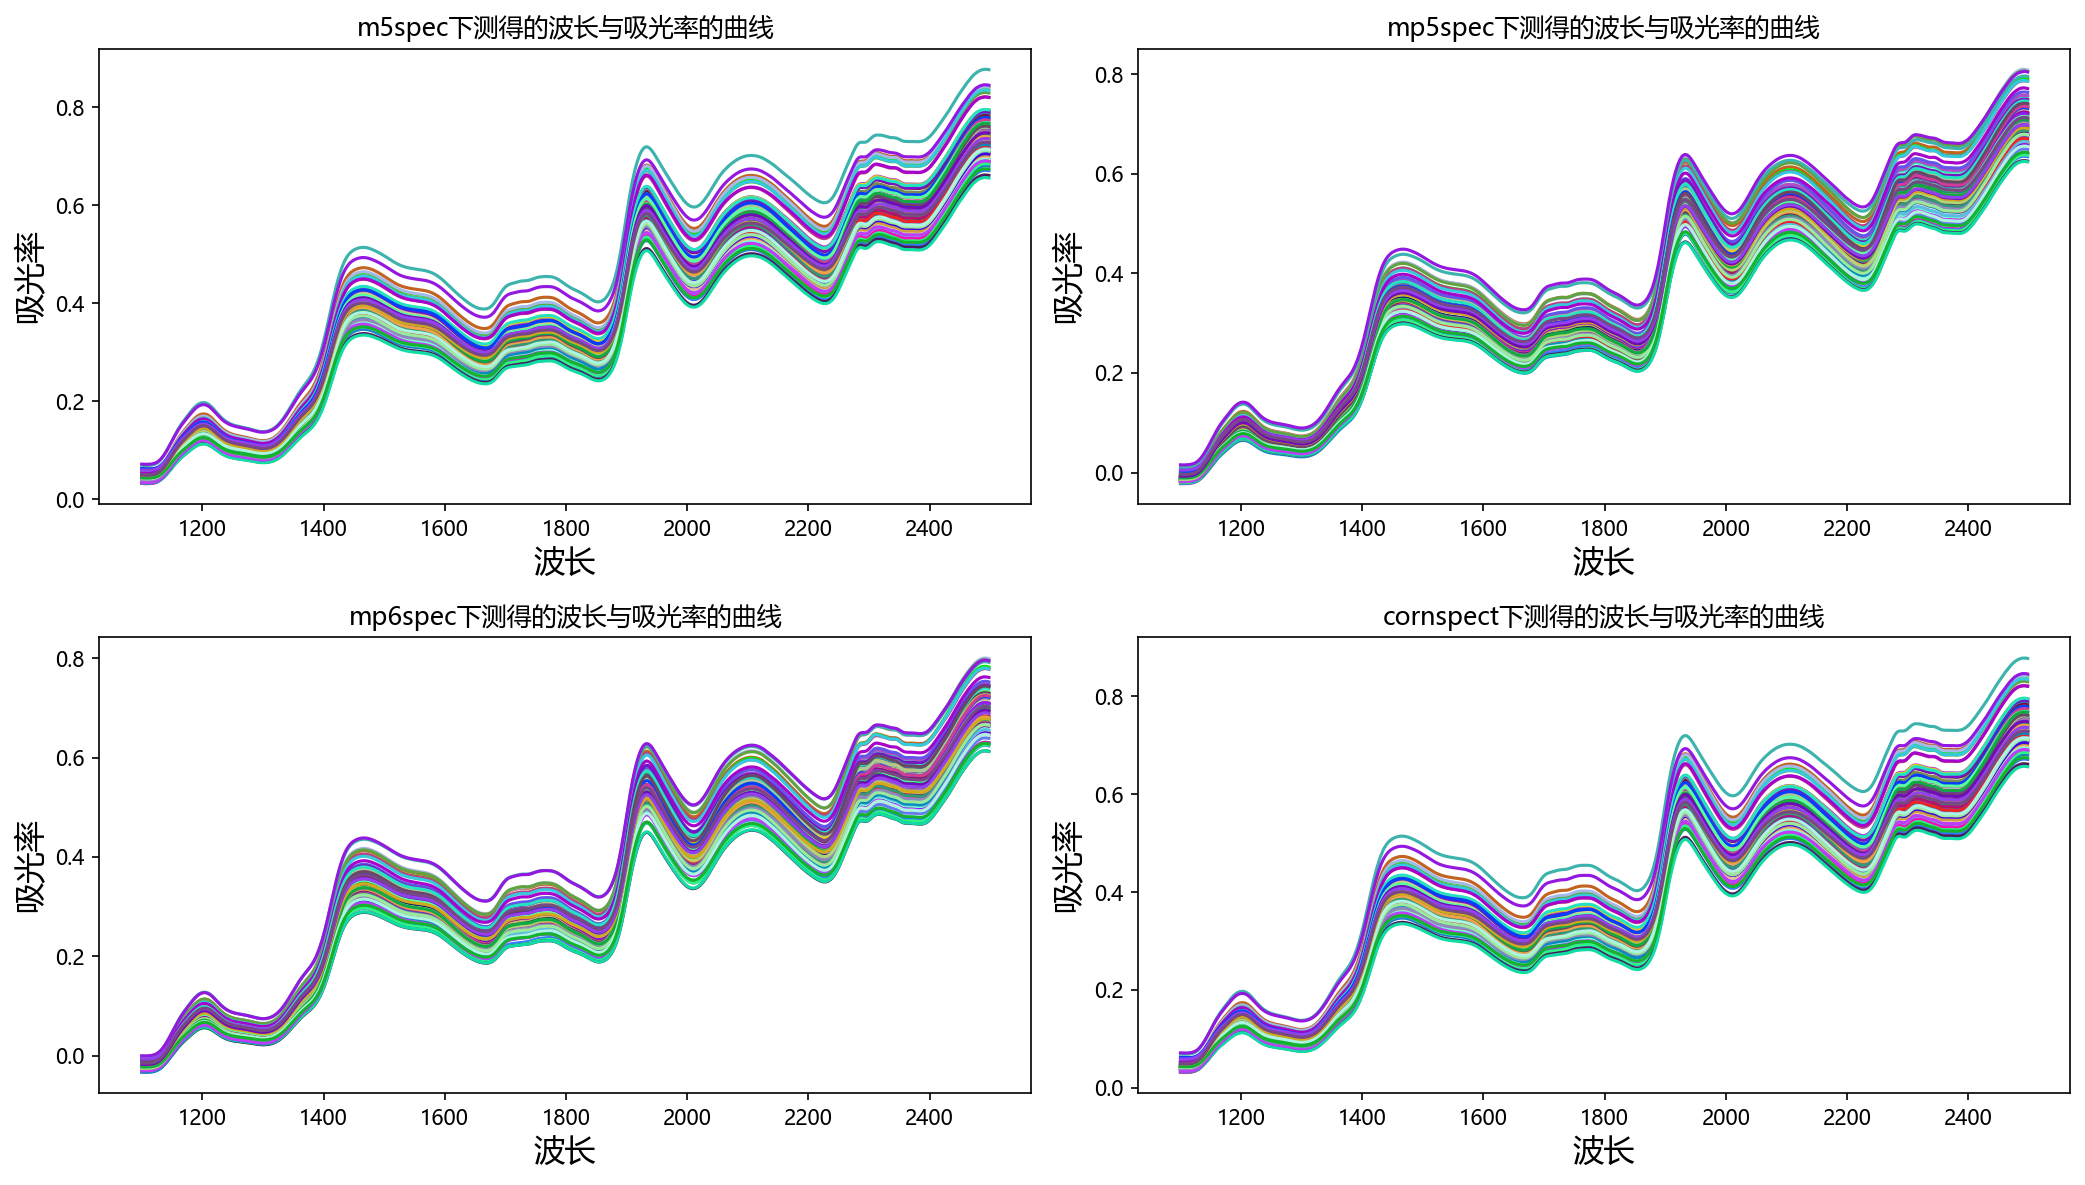

In [152]:
plt.figure(5)

fig = plt.figure(figsize=(14,8),dpi=150)  # 设置合理的间距

ax1 = fig.add_subplot(221) # 子图一
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("m5spec下测得的波长与吸光率的曲线")
plt.xlabel("波长", fontsize=15)
plt.ylabel("吸光率", fontsize=15)
for i in range(0,80):
    plt.plot(wavelength,m5spec[i],color=color[i]) # 绘图过程同3、4.1、4.2

ax2 = fig.add_subplot(222) # 子图二
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("mp5spec下测得的波长与吸光率的曲线")
plt.xlabel("波长", fontsize=15)
plt.ylabel("吸光率", fontsize=15)
for i in range(0,80):
    plt.plot(wavelength,mp5spec[i],color=color[i])
    
ax3 = fig.add_subplot(223) # 子图三
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("mp6spec下测得的波长与吸光率的曲线")
plt.xlabel("波长", fontsize=15)
plt.ylabel("吸光率", fontsize=15)
for i in range(0,80):
    plt.plot(wavelength,mp6spec[i],color=color[i])
    
ax4 = fig.add_subplot(224) # 子图四
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.title("cornspect下测得的波长与吸光率的曲线")
plt.xlabel("波长", fontsize=15)
plt.ylabel("吸光率", fontsize=15)
for i in range(0,80):
    plt.plot(wavelength,cornspect[i],color=color[i])
    

fig.tight_layout() #利用tight_layout()函数自动调整图片间大小松紧
plt.show()

## 选出一些样本放置一张图中对比

In [134]:
# 比如随机选取6个样本同时观察在不同仪器下的波长-吸光率曲线
example=np.random.randint(0,80,size=6)
example # 即样本集

array([72, 65, 10, 71, 42, 21])

<Figure size 432x288 with 0 Axes>

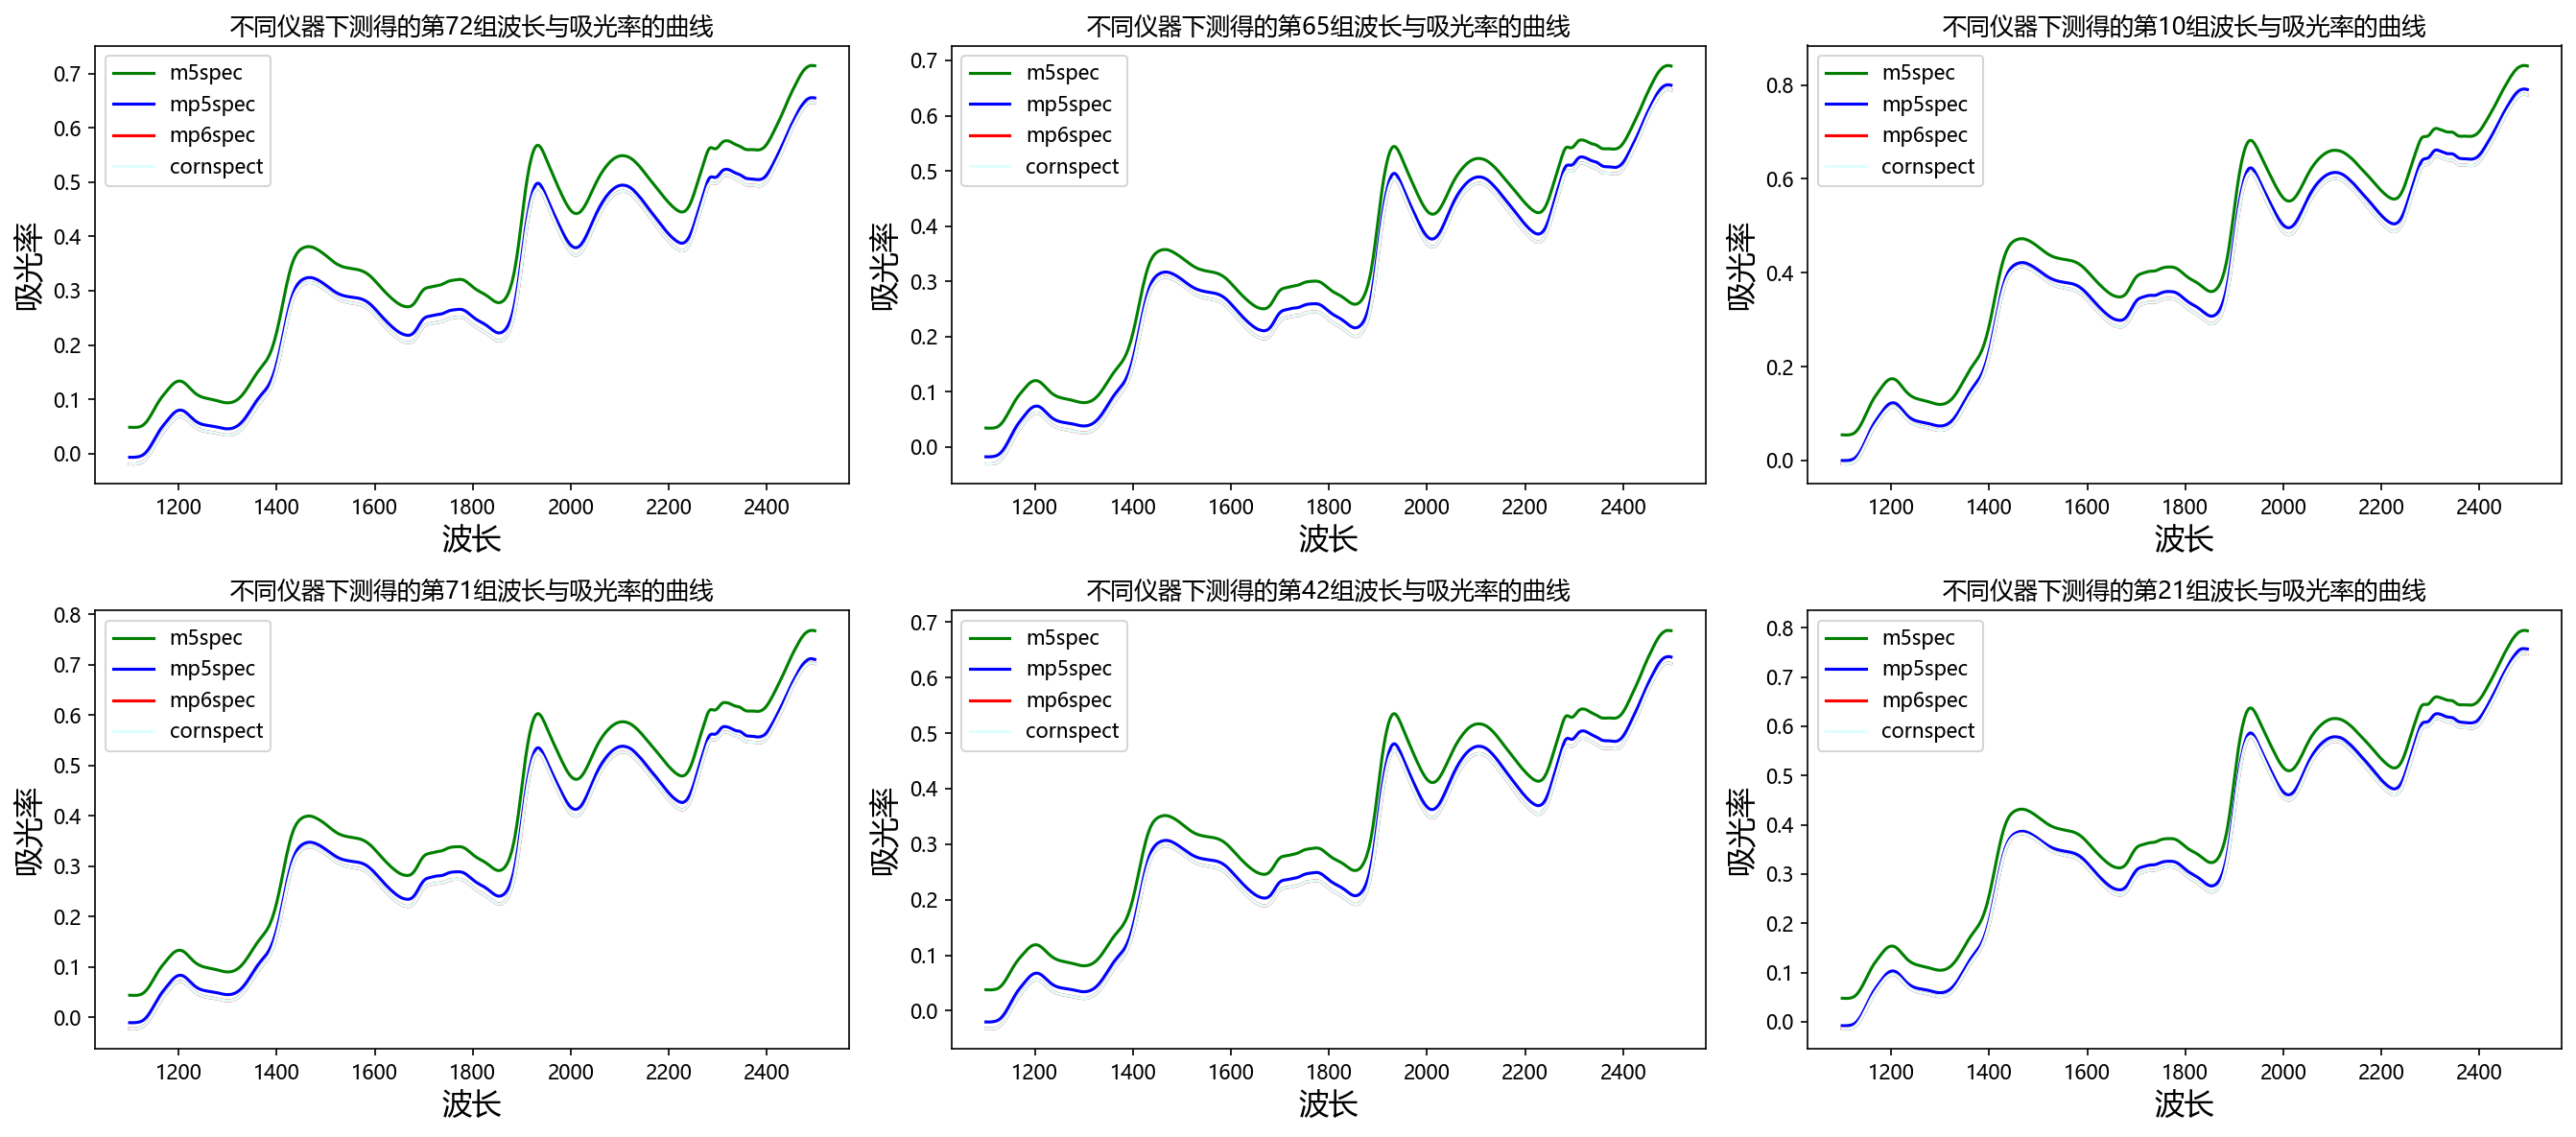

In [170]:
plt.figure(5)

fig = plt.figure(figsize=(18,8),dpi=150)  # 设置合理的间距

for i in range(0,6):
    ax = fig.add_subplot(2,3,i+1) # 子图一
    plt.rcParams['font.sans-serif']=['Microsoft YaHei']
    plt.title("不同仪器下测得的第%d组波长与吸光率的曲线"%example[i])
    plt.xlabel("波长", fontsize=15)
    plt.ylabel("吸光率", fontsize=15)
    ax.plot(wavelength,m5spec[example[i]],label="m5spec",color='green')
    ax.plot(wavelength,mp5spec[example[i]],label='mp5spec',color='blue')
    ax.plot(wavelength,mp6spec[example[i]],label='mp6spec',color='red')
    ax.plot(wavelength,mp6spec[example[i]],label='cornspect',color='lightcyan')
    plt.legend()

fig.tight_layout() #利用tight_layout()函数自动调整图片间大小松紧
plt.show()